### 理解循环神经网络

In [1]:
import numpy as np

# 设置随机种子
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
from numpy.distutils.lib2def import output_def

timesteps = 100 # 输入数据的时间步长
input_features = 32 # 输入数据的特征数量
output_features = 64 # 输出数据的特征数量

inputs = np.random.rand(timesteps, input_features) # 随机生成输入数据

state_t = np.zeros((output_features,)) # 初始化隐藏状态

# 创建随机的权重矩阵
w = np.random.random((output_features, input_features))
u = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
# 迭代计算每个时间步的输出和隐藏状态
successive_outputs = []
for t in range(timesteps):
    output_t = np.tanh(np.dot(w, inputs[t]) + np.dot(u, state_t) + b)
    successive_outputs.append(state_t)
    state_t = output_t

final_output = np.stack(successive_outputs, axis=0)
print(final_output.shape)



(100, 64)


/tmp/ipykernel_7065/265225440.py:2: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  from numpy.distutils.lib2def import output_def


 # RNN的核心是对当前的输入和权重矩阵w做点积 然后加上前一个状态和w的点积 然后加上一个bias 然后然后整体作为输入进入到激活函数里面去

## 核心公式：output_t = activation(np.dot(w, input_t) + np.dot(u, state_t-1) + b)

In [2]:
import tensorflow as tf
from keras.layers import SimpleRNN,Embedding
from keras.models import Sequential
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

I0000 00:00:1758619980.230743    7065 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9501 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences= True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences= True, unroll=True))
model.add(SimpleRNN(32, return_sequences= True, unroll=True))
model.add(SimpleRNN(32, return_sequences= True, unroll=True))
model.add(SimpleRNN(32, return_sequences= True, unroll=True))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow as tf
import os
import string
import re

# 1. 定义您的数据集的绝对路径
# 我已经将这里替换为您提供的路径
dataset_dir = '/home/dingziming/PycharmProjects/AI-Practices/python深度学习红书/深度学习用于文本和序列/处理文本数据/使用词嵌入/imdb数据集'

# --- 安全性检查：确保路径存在 ---
# 提示：请确保 'train' 和 'test' 文件夹直接位于上面这个路径之下
if not os.path.isdir(dataset_dir) or 'train' not in os.listdir(dataset_dir) or 'test' not in os.listdir(dataset_dir):
    print(f"错误：路径 '{dataset_dir}' 不存在或其中缺少 'train'/'test' 子文件夹。")
    print("请检查您的路径是否正确，以及解压后的文件结构是否正确。")
else:
    print(f"成功找到数据集路径: {dataset_dir}\n")

    # 2. 定义超参数
    batch_size = 32
    validation_split = 0.2
    seed = 42 # 保证每次分割验证集的结果都一样

    # 3. 使用 text_dataset_from_directory 创建训练和验证数据集
    # Keras会自动从 'train' 文件夹加载数据，并根据 'pos' 和 'neg' 子文件夹推断标签
    raw_train_ds = tf.keras.utils.text_dataset_from_directory(
        os.path.join(dataset_dir, 'train'),
        batch_size=batch_size,
        validation_split=validation_split,
        subset='training',
        seed=seed)

    raw_val_ds = tf.keras.utils.text_dataset_from_directory(
        os.path.join(dataset_dir, 'train'),
        batch_size=batch_size,
        validation_split=validation_split,
        subset='validation',
        seed=seed)

    # 4. 创建测试数据集
    raw_test_ds = tf.keras.utils.text_dataset_from_directory(
        os.path.join(dataset_dir, 'test'),
        batch_size=batch_size)

    print(f"训练集中的批次数量: {len(raw_train_ds)}")
    print(f"验证集中的批次数量: {len(raw_val_ds)}")
    print(f"测试集中的批次数量: {len(raw_test_ds)}")
    print("\n--- 原始数据集加载成功 ---\n")

    # 5. 准备文本向量化层 (TextVectorization)

    # 自定义标准化函数，用于去除HTML标签和标点符号
    def custom_standardization(input_data):
        lowercase = tf.strings.lower(input_data)
        stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
        return tf.strings.regex_replace(stripped_html,
                                      '[%s]' % re.escape(string.punctuation),
                                      '')

    # 定义模型所需的超参数 (与您之前的代码一致)
    max_features = 10000  # 词汇表大小
    maxlen = 500          # 序列最大长度

    # 创建 TextVectorization 层
    vectorize_layer = tf.keras.layers.TextVectorization(
        standardize=custom_standardization,
        max_tokens=max_features,
        output_mode='int',
        output_sequence_length=maxlen)

    # 6. 从原始文本数据中构建词汇表
    # 注意：我们只使用训练数据来构建词汇表 (adapt)
    print("正在根据训练数据构建词汇表...")
    train_text = raw_train_ds.map(lambda x, y: x)
    vectorize_layer.adapt(train_text)
    print("词汇表构建完成。\n")

    # 7. 将向量化应用到所有数据集
    def vectorize_text(text, label):
        text = tf.expand_dims(text, -1)
        return vectorize_layer(text), label

    train_ds = raw_train_ds.map(vectorize_text)
    val_ds = raw_val_ds.map(vectorize_text)
    test_ds = raw_test_ds.map(vectorize_text)

    print("--- 文本向量化完成 ---")
    print("现在，'train_ds', 'val_ds', 'test_ds' 已经准备就绪，可以直接用于 model.fit()")

    # 8. 检查处理后的数据
    print("\n--- 查看一个处理后的批次示例 ---")
    for text_vector_batch, label_batch in train_ds.take(1):
        print("评论向量 (形状): ", text_vector_batch.shape)
        print("标签 (形状): ", label_batch.shape)
        print("\n第一条评论的向量表示 (前20个词索引):")
        print(text_vector_batch[0, :20].numpy())
        print("\n对应的标签:")
        print(label_batch[0].numpy())

成功找到数据集路径: /home/dingziming/PycharmProjects/AI-Practices/python深度学习红书/深度学习用于文本和序列/处理文本数据/使用词嵌入/imdb数据集

Found 75000 files belonging to 3 classes.
Using 60000 files for training.
Found 75000 files belonging to 3 classes.
Using 15000 files for validation.
Found 25000 files belonging to 2 classes.
训练集中的批次数量: 1875
验证集中的批次数量: 469
测试集中的批次数量: 782

--- 原始数据集加载成功 ---

正在根据训练数据构建词汇表...
词汇表构建完成。

--- 文本向量化完成 ---
现在，'train_ds', 'val_ds', 'test_ds' 已经准备就绪，可以直接用于 model.fit()

--- 查看一个处理后的批次示例 ---
评论向量 (形状):  (32, 500)
标签 (形状):  (32,)

第一条评论的向量表示 (前20个词索引):
[  14  198  290  159  143    4    1    3  546  180   71  103  234   11
  821   18   55   11  401 4263]

对应的标签:
2


2025-09-23 17:33:12.187979: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-23 17:33:12.361960: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
# 构建一个模型来创建一个神经网络模型
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(train_ds, epochs=10, validation_data= val_ds,batch_size=128)


Epoch 1/10


2025-09-23 17:33:19.093870: I external/local_xla/xla/service/service.cc:163] XLA service 0x6285b70f6ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-23 17:33:19.093884: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-09-23 17:33:19.124325: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-23 17:33:19.264492: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:39 53ms/step - accuracy: 0.2257 - loss: 0.8703

I0000 00:00:1758619999.819369    7234 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1256/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.1657 - loss: -8.0947

KeyboardInterrupt: 

/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packa

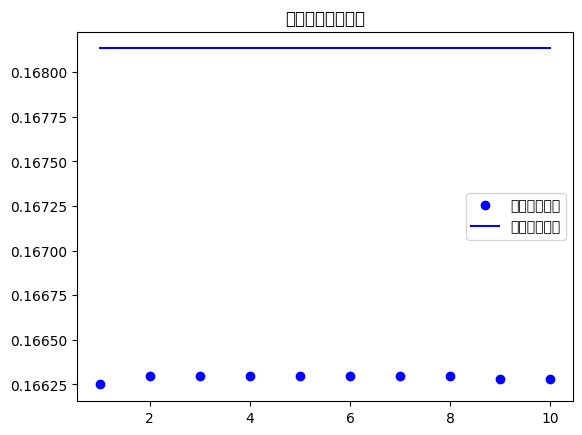

/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dingziming/anaconda3/envs/DL-310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


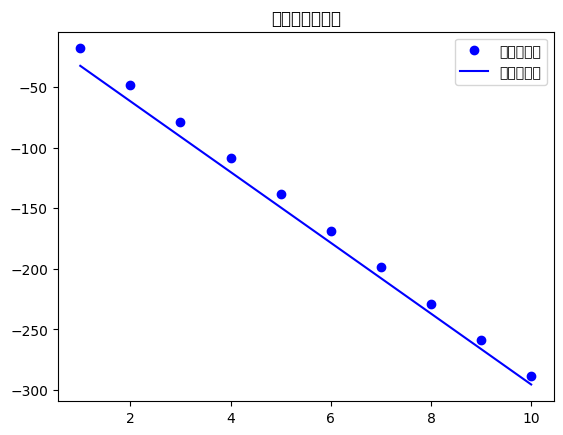

In [13]:
# 绘制结果
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="训练集准确率")
plt.plot(epochs, val_acc, "b", label="验证集准确率")
plt.title("训练和验证准确率")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="训练集损失")
plt.plot(epochs, val_loss, "b", label="验证集损失")
plt.title("训练和验证损失")
plt.legend()
plt.show()

In [7]:
# 使用Keras里面的LSTM层
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation= "sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, epochs=10, validation_data=val_ds, batch_size=128)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1663 - loss: -19.4468 - val_accuracy: 0.1681 - val_loss: -33.8292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1663 - loss: -49.8572 - val_accuracy: 0.1681 - val_loss: -63.0999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1663 - loss: -79.9234 - val_accuracy: 0.1681 - val_loss: -92.3005
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1663 - loss: -109.9469 - val_accuracy: 0.1681 - val_loss: -121.4826
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1663 - loss: -139.9733 - val_accuracy: 0.1681 - val_loss: -150.6816
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.1663 - loss: -170.0111 - val_accuracy: 0.1681 - val_loss: -179.8764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1663 - loss: -200.0486 - val_accuracy: 0.1681 - val_loss: -209.0827
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [8]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,061 (3.76 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 656,708 (2.51 MB)